<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Analyzing the Apprentice Chef's First Year Customer </h2>
<h4>DAT-5303 | Analysis Report to Management | Individual Assignment</h4>
Models used OLS Regression and Tuned Random Forest<br>
Created by <a href="https://www.linkedin.com/in/linginenivishal/"> Vishal Lingineni </a> <br>
Hult International Business School

<h2>Purpose of this Script</h2><br>
Developing a consolidated report containing my top actionable insights from the case as well as my final revenue and cross-sell promotion models.
<br>

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Managment Report</h2>

<strong> Brief Introduction </strong><br>
Apprentice Chef has been serving customers across the San Francisco’s Bay Area from the past three years. They want to understand how much revenue they can expect from each customer and promote their Halfway-There promotion to a broader audience. To better understand these two tasks, they hired us to analyze their first years’ service data and generate some actionable insights.  


<strong>Methodology</strong> <br>
The Data that we got from the Data Science team contains information about 2000 customers who had at least purchased once per month with a total of 11 purchases or one purchase per quarter with at least 15 purchases throughout their first year.


<strong>Actionable Insights </strong>
<li>A Customer who has a lengthy name and subscribed using a personal or professional email is more likely to opt for our promotion than a customer who subscribes using junk email.</li>
<li>Junk email group has the second most potent influence on our promotion. Only 41% of customers from that group subscribed to our promotion, leaving us potential untapped customers left unexplored. </li>
<li>One unit increase in video preparations is expected to improve the revenue from each customer by 0.04%, So having more detailed videos will motivate customers to buy more. </li> 
<li>Customers registered using any of the three classified email domains given by marketing team will have the same effect on revenue even though their response rates are different.  </li>

<strong>Performance Metrics for the models </strong><br>
<li>The Accuracy of the Model predicting expected revenue from each customer is 78.197.</li>
<li>The AUC of the Model classifying a potential Halfway-There promotion customer is 76.278.</li> 


<strong>Conclusion</strong> <br>
In conclusion, <i>increasing the duration of preparation instructions </i>will help grow the revenue. Customers from the junk emails category are the least subscriber group to our promotion, so <i>focusing more on them </i>will help us reach more customers.


<strong>KPI </strong><br>
<i>Conversion rate </i>acts as a good way to measure whether we are able to get more customers from junk email section. <br>
<i>View-Trough Rate </i>can be used to see how targeted our videos are, along with this we can use <i>conversion rate</i> to check the increase in revenue after the new video is added

<h2>Coding Details </h2>

<h4>Importing the Dataset </h4>

In [69]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
import random as rand                     # random number gen
import numpy as np # numpy package
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset_Rich.xlsx'

# reading the file into Python
restarunt = pd.read_excel(io=file)

In [70]:
restarunt.shape

(1946, 56)

<h4>Revenue Prediction Model</h4>

In [71]:
restarunt_data   = restarunt.drop(['revenue','revenue_per_order',
                                 'log_revenue',
                                 'email','first_name','name','family_name'],
                               axis = 1)


# preparing response variables
restarunt_target = restarunt.loc[ : , 'revenue']
log_restarunt_target = restarunt.loc[ : , 'log_revenue']



# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            log_restarunt_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 49)
y-side: (1459,)


Testing Data
------------
X-side: (487, 49)
y-side: (487,)



In [72]:
# merging X_train and y_train so that they can be used in statsmodels
restarunt_train = pd.concat([x_train, y_train], axis = 1)

# blueprinting a OLS fit model type
lm_full = smf.ols(formula = """log_revenue ~
cross_sell_success +
total_meals_ordered +
unique_meals_purch +
avg_prep_vid_time +
median_meal_rating +
has_master_classes_attended +
has_total_photos_viewed +
recurring_complaints +
log_contacts_w_customer_service +
log_median_meal_rating +
log_largest_order_size +
log_unique_meals_purch +
junk +
personal +
professional +
andy +
female +
male +
mostly_female +
mostly_male +
unknown""",
                  data = restarunt_train)
                  
# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_revenue   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     259.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):               0.00
Time:                        04:04:50   Log-Likelihood:                 1295.7
No. Observations:                1459   AIC:                            -2551.
Df Residuals:                    1439   BIC:                            -2446.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.8516      0.016    117.978      0.000       1.821       1.882
cross_sell_success                 -0.0160      0.006     -2.681      0.007      -0.028      -0.004
total_meals_ordered                 0.0007   6.27e-05     10.916      0.000       0.001       0.001
unique_meals_purch                  0.0439      0.003     13.789      0.000       0.038       0.050
avg_prep_vid_time                   0.0012   9.39e-05     13.305      0.000       0.001       0.001
median_meal_rating                  0.1250      0.016      7.633      0.000       0.093       0.157
has_master_classes_attended         0.0421      0.006      6.829      0.000       0.030       0.054
has_total_photos_viewed             0.0289      0.006      4.886      0.000       0.017       0.040
recurring_complaints               -0.2547      0.013    -19.222      0.000      -0.281      -0.229
log_contacts_w_customer_service     0.2763      0.025     10.961      0.000       0.227       0.326
log_median_meal_rating             -0.3571      0.088     -4.073      0.000      -0.529      -0.185
log_largest_order_size             -0.0572      0.026     -2.221      0.027      -0.108      -0.007
log_unique_meals_purch             -0.5555      0.029    -18.925      0.000      -0.613      -0.498
junk                                0.6150      0.007     90.243      0.000       0.602       0.628
personal                            0.6178      0.006     97.136      0.000       0.605       0.630
professional                        0.6188      0.007     93.322      0.000       0.606       0.632
andy                                0.3003      0.029     10.283      0.000       0.243       0.358
female                              0.2954      0.011     25.888      0.000       0.273       0.318
male                                0.3170      0.009     34.186      0.000       0.299       0.335
mostly_female                       0.3211      0.022     14.313      0.000       0.277       0.365
mostly_male                         0.3143      0.021     14.739      0.000       0.272       0.356
unknown                             0.3034      0.008     37.234      0.000       0.287       0.319
==============================================================================
Omnibus:                      251.133   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1536.514
Skew:                          -0.649   Prob(JB):                         0.00
Kurtosis:                       7.857   Cond. No.                     1.87e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] Th

In [73]:
# this variables are selected from OLS Fit model
x_variables = ['cross_sell_success' ,
'total_meals_ordered' ,
'unique_meals_purch' ,
'avg_prep_vid_time' ,
'median_meal_rating' ,
'has_master_classes_attended' ,
'has_total_photos_viewed' ,
'recurring_complaints' ,
'log_contacts_w_customer_service' ,
'log_median_meal_rating' ,
'log_largest_order_size' ,
'log_unique_meals_purch' ,
'junk' ,
'personal' ,
'professional',
'andy',
'female', 
'male',
'mostly_female',
'mostly_male',
'unknown'
]

In [74]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = restarunt[x_variables]


# preparing response variable
log_restarunt_target = restarunt['log_revenue']

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset and (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            restarunt_data,     # x-variables
            log_restarunt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# Selected x-dataset and (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            restarunt_data,     # x-variables
            log_restarunt_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [88]:
# OLS model using scikit-learn

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(5))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(5)) # using R-square

# saving scoring results
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(5)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(5)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(5))
lr_test_gap = abs(lr_train_score - lr_test_score).round(5)

OLS Training Score : 0.7864
OLS Testing Score  : 0.78197
OLS Train-Test Gap : 0.00443


In [76]:
# zipping each feature name to its coefficient
lr_model_values = zip(restarunt_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3.03)
('cross_sell_success', 0.0)
('total_meals_ordered', -0.01)
('unique_meals_purch', 0.0)
('avg_prep_vid_time', 0.04)
('median_meal_rating', 0.04)
('has_master_classes_attended', 0.01)
('has_total_photos_viewed', -0.0)
('recurring_complaints', 0.0)
('log_contacts_w_customer_service', 0.0)
('log_median_meal_rating', -0.01)
('log_largest_order_size', 0.01)
('log_unique_meals_purch', -0.0)
('junk', -0.01)
('personal', 0.0)
('professional', -0.0)
('andy', 0.0)
('female', -0.01)
('male', -0.01)
('mostly_female', 0.0)
('mostly_male', -0.04)
('unknown', 0.01)


In [89]:
print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
\033[1mOLS**      {lr_train_score}            {lr_test_score}\033[0m (Log_revenue is the Y variable)
""")


Model      Train Score      Test Score
-----      -----------      ----------
OLS**      0.7864            0.78197 (Log_revenue is the Y variable)



<h4>Cross Sell Success Prediction Model</h4>

In [78]:
# declaring explanatory variables
restarunt_data = restarunt.drop(['cross_sell_success','name','email','first_name','family_name'], axis = 1)


# declaring response variable
restarunt_response = restarunt.loc[ : , 'cross_sell_success']


In [79]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            restarunt_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = restarunt_response)


# merging training data for statsmodels
restarunt_train = pd.concat([x_train, y_train], axis = 1)

In [80]:
# these are the variables that we selected for predicting cross sell sucess 
logit_sig2 = ['mobile_number','cancellations_before_noon',
            'tastes_and_preferences','pc_logins','early_deliveries','avg_prep_vid_time',
              'junk','personal','len_of_name','refrigerated_locker','female','male'] 

In [81]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ cross_sell_success ~
len_of_name +
mobile_number +
cancellations_before_noon +
tastes_and_preferences +
pc_logins +
early_deliveries +
avg_prep_vid_time+
refrigerated_locker+
junk +
personal +
male  +
female 
 """,
                                        data    = restarunt_train)

# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.532608
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     cross_sell_success   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                  0.1518
Time:                        04:04:51   Log-Likelihood:                -777.07
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.718e-52
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.8412      0.684     -4.151      0.000      -4.183      -1.500
len_of_name                   0.0804      0.013      6.211      0.000       0.055       0.106
mobile_number                 0.9237      0.178      5.180      0.000       0.574       1.273
cancellations_before_noon     0.2813      0.047      5.989      0.000       0.189       0.373
tastes_and_preferences        0.3829      0.137      2.797      0.005       0.115       0.651
pc_logins                     0.2508      0.108      2.324      0.020       0.039       0.462
early_deliveries              0.0617      0.028      2.213      0.027       0.007       0.116
avg_prep_vid_time             0.0026      0.001      2.057      0.040       0.000       0.005
refrigerated_locker           0.5323      0.211      2.517      0.012       0.118       0.947
junk                         -1.9312      0.173    -11.138      0.000      -2.271      -1.591
personal                     -0.6027      0.146     -4.140      0.000      -0.888      -0.317
male                          0.4872      0.168      2.907      0.004       0.159       0.816
female                       -0.6332      0.240     -2.639      0.008      -1.104      -0.163
=============================================================================================
"""

As we can see all the selected features are having significant P-value

In [82]:
# train/test split with the full model
restarunt_data   =  restarunt.loc[ : , logit_sig2]
restarunt_target =  restarunt.loc[ : , 'cross_sell_success']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            restarunt_data,
            restarunt_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = restarunt_target)

In [91]:
# building a model based on hyperparameter tuning results

# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(restarunt_data, restarunt_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(5))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(5))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(5))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(5) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(5)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(5) # auc

Forest Tuned Training ACCURACY: 0.79712
Forest Tuned Testing  ACCURACY: 0.82957
Forest Tuned AUC Score        : 0.76278


In [84]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

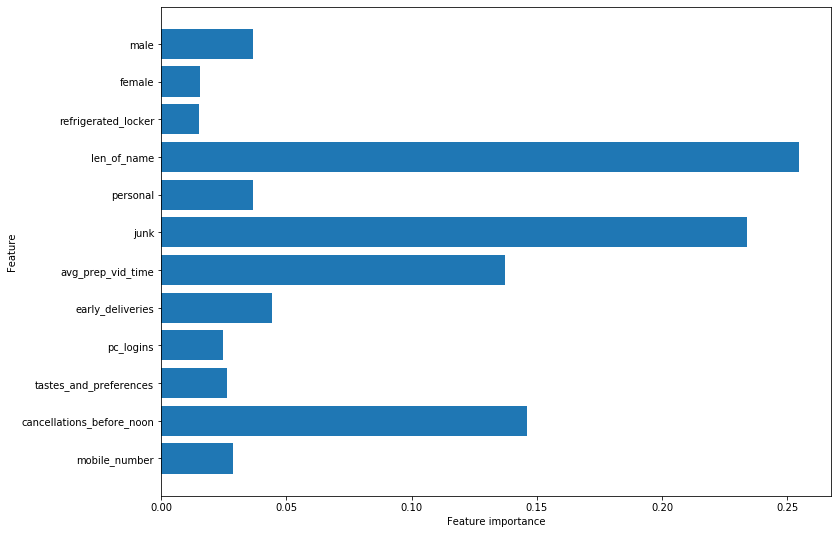

In [85]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [86]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 90
False Positives: 66
False Negatives: 17
True Positives : 314



In [87]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
Classification_model_performance ={
                           'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : [(tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)]}



# converting model_performance into a DataFrame
Classification_model_performance = pd.DataFrame(Classification_model_performance)

# checking the results
Classification_model_performance

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
0,Tuned Random Forest (Full),0.7971,0.8296,0.7628,"(90, 66, 17, 314)"
